In [1]:
# general tools
import sys
from glob import glob

# data tools
import time
import h5py
import random
import numpy as np
from random import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [3]:
from sklearn.metrics import classification_report, auc, roc_curve
from sklearn.metrics import confusion_matrix

In [4]:
temp_dir = '/glade/work/ksha/NCAR/Keras_models/'

In [5]:
score_shuffle_p1 = np.load(temp_dir+'CONVNEXT_Base_pp19_tune3'+'_FI.npy')
score_shuffle_p2 = np.load(temp_dir+'CONVNEXT_Base_pp19_tune3'+'_FI_2.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/glade/work/ksha/NCAR/Keras_models/CONVNEXT_Base_pp19_tune3_FI_2.npy'

In [ ]:
TN = 4777
FP = 190
FN = 16
TP = 17

In [1]:
names = [
    'Max/Comp Radar',
    'MSLP',
    'AGL',
    'UH 2-5 km',
    'UH 0-2 km',
    'UH 0-3 km',
    'Vorticity 0-2 km',
    'Vorticity 0-1 km',
    'Graupel mass',
    'T 2m',
    'Dewpoint 2m',
    'U 10m',
    'V 10m',
    'SPD 10m',
    'APCP',
    'CAPE',
    'CIN',
    'SRH 0-3 km',
    'SRH 0-1 km',
    'U shear 0-1 km',
    'V shear 0-1 km',
    'U shear 0-6 km',
    'V shear 0-6 km']

In [5]:
name_pick = []
ind_pick = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

for i in ind_pick:
    name_pick.append(names[i])

In [6]:
len(name_pick)

23

**CSI (critical success index) = tp/(tp+fn+fp)**

In [19]:
base_ = TP/(TP+FN+FP)
score_csi = score_shuffle[:, 3, :] / (score_shuffle[:, 1, :] + score_shuffle[:, 2, :] + score_shuffle[:, 3, :])

csi_min = np.min(score_csi, axis=1)
csi_max = np.max(score_csi, axis=1)
csi_mean = base_ - np.mean(score_csi, axis=1)

print('Original: {}'.format(base_))

for i in range(19):
    print('{} - {} {}'.format(i, csi_mean[i], name_pick[i]))

Original: 0.07623318385650224
0 - 0.023979881603199985 Max/Comp Radar
1 - 0.0565031007333118 MSLP
2 - 0.014070327447563119 UH 2-5 km
3 - 0.005943179742968707 UH 0-2 km
4 - 0.0036704524702414476 UH 0-3 km
5 - -0.00048639286307447516 T 2m
6 - 0.008311371597997802 Dewpoint 2m
7 - 0.006586719210037589 U 10m
8 - 0.03104674317853614 V 10m
9 - 0.014432261157441534 SPD 10m
10 - 0.00482311908320876 APCP
11 - 0.03601079121846543 CAPE
12 - 0.0194261977391713 CIN
13 - 0.033875473510450255 SRH 0-3 km
14 - 0.01699670207418616 SRH 0-1 km
15 - 0.04372252307685018 U shear 0-1 km
16 - 0.02932787615063026 V shear 0-1 km
17 - 0.007207109323819766 U shear 0-6 km
18 - 0.0031357205721230796 V shear 0-6 km


In [30]:
cyan

array([0.33333333, 0.62745098, 1.        , 1.        ])

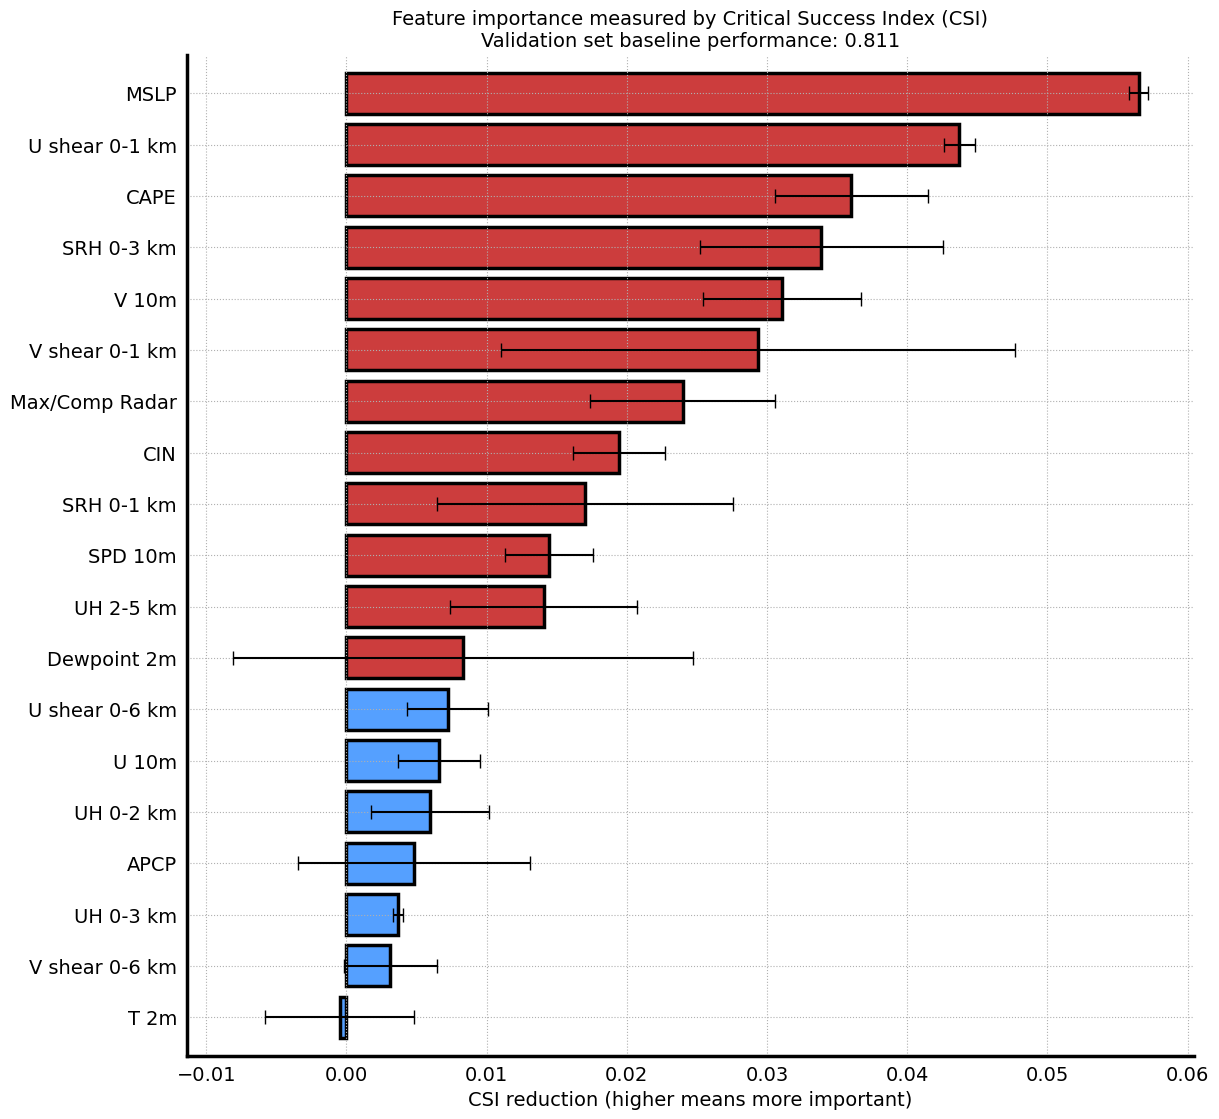

In [20]:
base_ = TP/(TP+FN+FP)
score_csi = score_shuffle[:, 3, :] / (score_shuffle[:, 1, :] + score_shuffle[:, 2, :] + score_shuffle[:, 3, :])

csi_min = np.min(score_csi, axis=1)
csi_max = np.max(score_csi, axis=1)
csi_mean = base_ - np.mean(score_csi, axis=1)
ind_order = np.argsort(csi_mean)

name_label = np.array(name_pick)[ind_order]
csi_min = csi_min[ind_order]
csi_max = csi_max[ind_order]
csi_mean = csi_mean[ind_order]

fake_x = np.arange(L_var)

fig = plt.figure(figsize=(13, 13))
ax = fig.gca()
ax = gu.ax_decorate(ax, left_flag = True, bottom_flag = True, bottom_spline=True)
ax.xaxis.grid(True)

for i in range(19):
    if i < 7:
        fc = cyan
    else:
        fc = red
        
    ax.barh(fake_x[i], csi_mean[i], xerr=(csi_max[i]-csi_min[i]), linewidth=2.5, edgecolor='k', facecolor=fc, capsize=5);
    
ax.set_yticks(fake_x, labels=name_label, fontsize=14);
ax.set_ylim([-0.75, 18.75])
ax.set_title("Feature importance measured by Critical Success Index (CSI)\nValidation set baseline performance: 0.811", fontsize=14);
ax.set_xlabel("CSI reduction (higher means more important)", fontsize=14);


**POFD (probability of false detection) = fp/(tn+fp)**

In [32]:
base_ = score_original[1]
score_csi = score_shuffle[:, 1, :]

csi_min = np.min(score_csi, axis=1)
csi_max = np.max(score_csi, axis=1)
csi_mean = np.mean(score_csi, axis=1) - base_

for i in range(19):
    print('{} - {} {}'.format(i, csi_mean[i], name_pick[i]))

0 - -0.0008333333333333335 Max/Comp Radar
1 - 0.0055 MSLP
2 - 0.006333333333333333 UH 2-5 km
3 - 0.0 UH 0-2 km
4 - 0.0004999999999999996 UH 0-3 km
5 - 0.0025833333333333333 T 2m
6 - -0.0022500000000000003 Dewpoint 2m
7 - -0.0002500000000000002 U 10m
8 - 0.0005833333333333333 V 10m
9 - 0.0013333333333333322 SPD 10m
10 - 0.0115 APCP
11 - 0.0013333333333333322 CAPE
12 - 0.003166666666666665 CIN
13 - 0.002666666666666666 SRH 0-3 km
14 - 0.0012499999999999994 SRH 0-1 km
15 - 0.0014999999999999996 U shear 0-1 km
16 - 0.00016666666666666566 V shear 0-1 km
17 - 0.004749999999999999 U shear 0-6 km
18 - 0.00016666666666666566 V shear 0-6 km


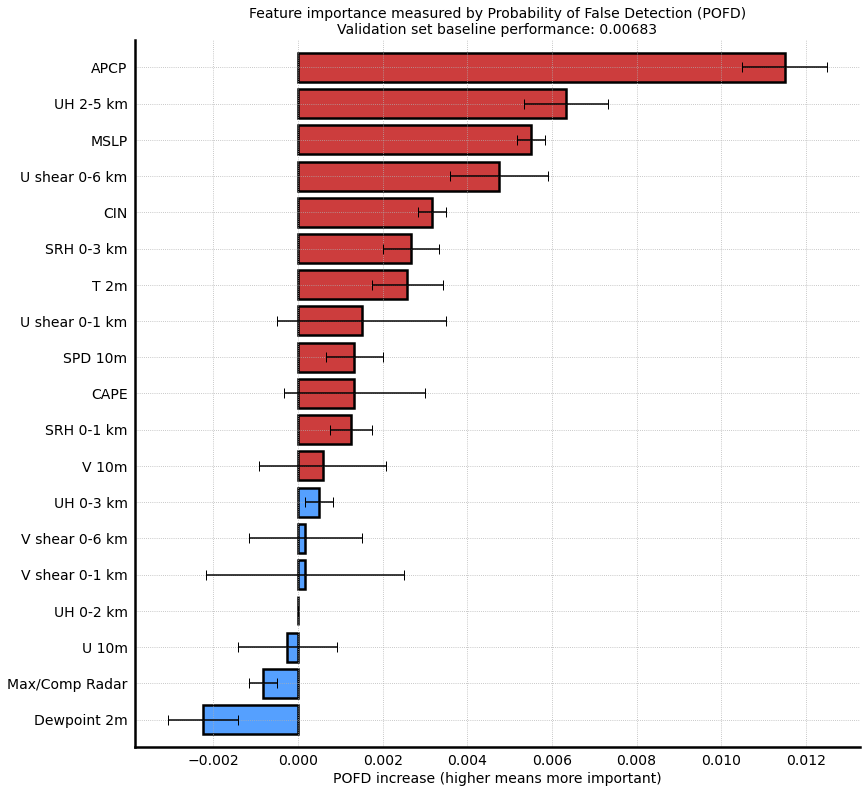

In [33]:
base_ = score_original[1]
score_csi = score_shuffle[:, 1, :]

csi_min = np.min(score_csi, axis=1)
csi_max = np.max(score_csi, axis=1)
csi_mean = np.mean(score_csi, axis=1) - base_
ind_order = np.argsort(csi_mean)

name_label = np.array(name_pick)[ind_order]
csi_min = csi_min[ind_order]
csi_max = csi_max[ind_order]
csi_mean = csi_mean[ind_order]

fake_x = np.arange(L_var)

fig = plt.figure(figsize=(13, 13))
ax = fig.gca()
ax = gu.ax_decorate(ax, left_flag = True, bottom_flag = True, bottom_spline=True)
ax.xaxis.grid(True)

for i in range(19):
    if i < 7:
        fc = cyan
    else:
        fc = red
        
    ax.barh(fake_x[i], csi_mean[i], xerr=(csi_max[i]-csi_min[i]), linewidth=2.5, edgecolor='k', facecolor=fc, capsize=5);
    
ax.set_yticks(fake_x, labels=name_label, fontsize=14);
ax.set_ylim([-0.75, 18.75])
ax.set_title("Feature importance measured by Probability of False Detection (POFD)\nValidation set baseline performance: 0.00683", fontsize=14);
ax.set_xlabel("POFD increase (higher means more important)", fontsize=14);

**AUC**

In [34]:
base_ = score_original[2]
score_csi = score_shuffle[:, 2, :]

csi_min = np.min(score_csi, axis=1)
csi_max = np.max(score_csi, axis=1)
csi_mean = base_ - np.mean(score_csi, axis=1)

for i in range(19):
    print('{} - {} {}'.format(i, csi_mean[i], name_pick[i]))

0 - 0.013129729166666548 Max/Comp Radar
1 - 0.015016958333333275 MSLP
2 - 0.006588374999999869 UH 2-5 km
3 - 0.00281497916666662 UH 0-2 km
4 - 0.0007748333333331692 UH 0-3 km
5 - 0.005075562500000075 T 2m
6 - 0.0005513333333332371 Dewpoint 2m
7 - 0.009950145833333202 U 10m
8 - 0.006443875000000099 V 10m
9 - -0.00035729166666664813 SPD 10m
10 - 0.001824229166666691 APCP
11 - 0.11239222916666658 CAPE
12 - 0.009501166666666672 CIN
13 - 0.006053666666666735 SRH 0-3 km
14 - 0.006583458333333292 SRH 0-1 km
15 - 0.016300374999999923 U shear 0-1 km
16 - 0.021633750000000007 V shear 0-1 km
17 - 0.025260479166666627 U shear 0-6 km
18 - 0.0029300416666665496 V shear 0-6 km


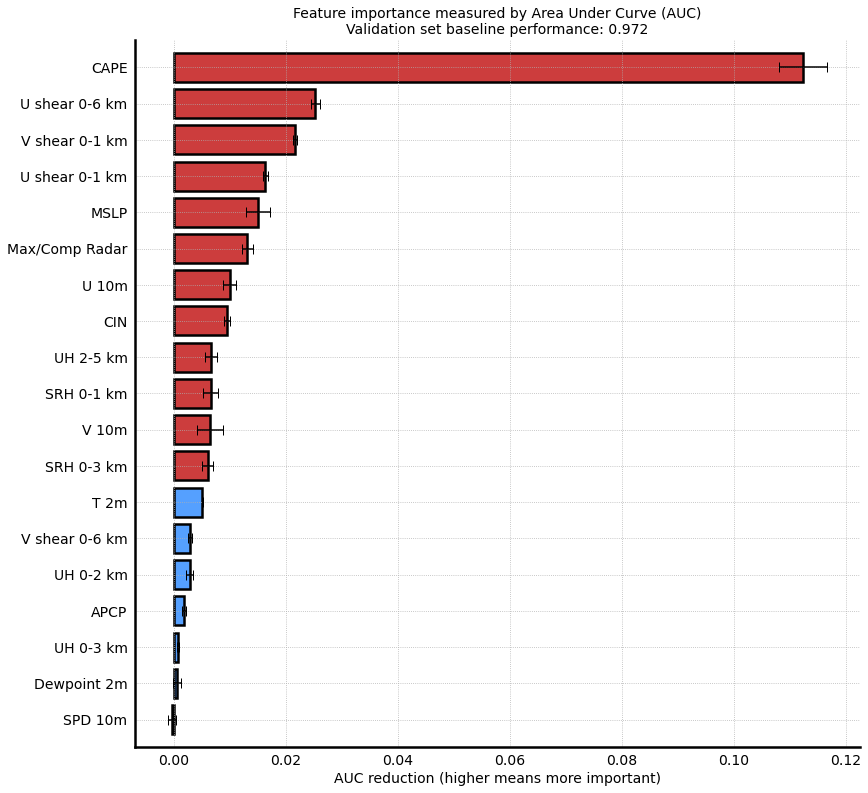

In [35]:
base_ = score_original[2]
score_csi = score_shuffle[:, 2, :]

csi_min = np.min(score_csi, axis=1)
csi_max = np.max(score_csi, axis=1)
csi_mean = base_ - np.mean(score_csi, axis=1)
ind_order = np.argsort(csi_mean)

name_label = np.array(name_pick)[ind_order]
csi_min = csi_min[ind_order]
csi_max = csi_max[ind_order]
csi_mean = csi_mean[ind_order]

fake_x = np.arange(L_var)

fig = plt.figure(figsize=(13, 13))
ax = fig.gca()
ax = gu.ax_decorate(ax, left_flag = True, bottom_flag = True, bottom_spline=True)
ax.xaxis.grid(True) 

for i in range(19):
    if i < 7:
        fc = cyan
    else:
        fc = red
        
    ax.barh(fake_x[i], csi_mean[i], xerr=(csi_max[i]-csi_min[i]), linewidth=2.5, edgecolor='k', facecolor=fc, capsize=5);
    
ax.set_yticks(fake_x, labels=name_label, fontsize=14);
ax.set_ylim([-0.75, 18.75])
ax.set_title("Feature importance measured by Area Under Curve (AUC)\nValidation set baseline performance: 0.972", fontsize=14);
ax.set_xlabel("AUC reduction (higher means more important)", fontsize=14);

**The big eight**:
    
* CAPE
* CIN
* UH 2-5
* U shear 0-6 km
* U shear 0-1 km
* SRH 0-3 km
* SRH 0-1 km
* MSLP

**Others**

* Max/Comp Radar: it contributes heavily on identifying tornados, but it also triggers false alarms
* APCP: it does nothing on identifying tornados, but it contributes on eliminating non-tornados
* V shear 0-1 km: it contributes to the tornado classifications, but it triggers false alarms, not as bad as Radar.

**Pick one from highly correlated features**

* U shear 0-6 km > U shear 0-1 km
* SRH 0-3 km > SRH 0-1 km


**Final decision (6-var comobo)**

* CAPE
* CIN
* UH 2-5
* U shear 0-6 km
* SRH 0-3 km
* MSLP

**Final decision (8-var comobo)**

* CAPE
* CIN
* UH 2-5
* U shear 0-6 km
* SRH 0-3 km
* MSLP
* APCP
* V shear 0-1 km

In [7]:
for i, name in enumerate(name_pick):
    print('{} - {}'.format(i, name))

0 - Max/Comp Radar
1 - MSLP
2 - AGL
3 - UH 2-5 km
4 - UH 0-2 km
5 - UH 0-3 km
6 - Vorticity 0-2 km
7 - Vorticity 0-1 km
8 - Graupel mass
9 - T 2m
10 - Dewpoint 2m
11 - U 10m
12 - V 10m
13 - SPD 10m
14 - APCP
15 - CAPE
16 - CIN
17 - SRH 0-3 km
18 - SRH 0-1 km
19 - U shear 0-1 km
20 - V shear 0-1 km
21 - U shear 0-6 km
22 - V shear 0-6 km


In [10]:
ind_pick_from_batch = [0, 3, 4, 8, 9, 10, 13, 14, 17, 18, 21, 22]
ind_pick_from_batch = [0, 1, 3, 4, 8, 9, 10, 13, 14, 15, 16, 17, 18, 21, 22]

In [9]:
ind_pick_from_raw = []
for i in ind_pick_from_batch:
    ind_pick_from_raw.append(ind_pick[i])

In [2]:
ind_pick_from_raw = [0, 1, 3, 4, 8, 9, 10, 13, 14, 15, 16, 17, 18, 21, 22]
#ind_pick_from_batch = [1, 2, 5, 9, 10, 11, 12, 13, 17, 18]

In [3]:
for i in ind_pick_from_raw:
    print('{}'.format(names[i]))

Max/Comp Radar
MSLP
UH 2-5 km
UH 0-2 km
Graupel mass
T 2m
Dewpoint 2m
SPD 10m
APCP
CAPE
CIN
SRH 0-3 km
SRH 0-1 km
U shear 0-6 km
V shear 0-6 km


In [24]:
for i in ind_pick_from_batch:
    print('{}'.format(name_pick[i]))

MSLP
UH 2-5 km
T 2m
SPD 10m
APCP
CAPE
CIN
SRH 0-3 km
U shear 0-6 km
V shear 0-6 km
